## Alpha Levels

In [27]:
import json
with open('alpha_1_experiment.json', 'r') as file:
    data = json.load(file)

data[0].keys()

dict_keys(['dataset', 'n_labels', 'corruption_rate', 'alpha', 'seed', 'final_test_elbo', 'final_test_accuracy', 'train_elbos', 'test_elbos', 'test_accuracies', 'disentanglement_metrics', 'config'])

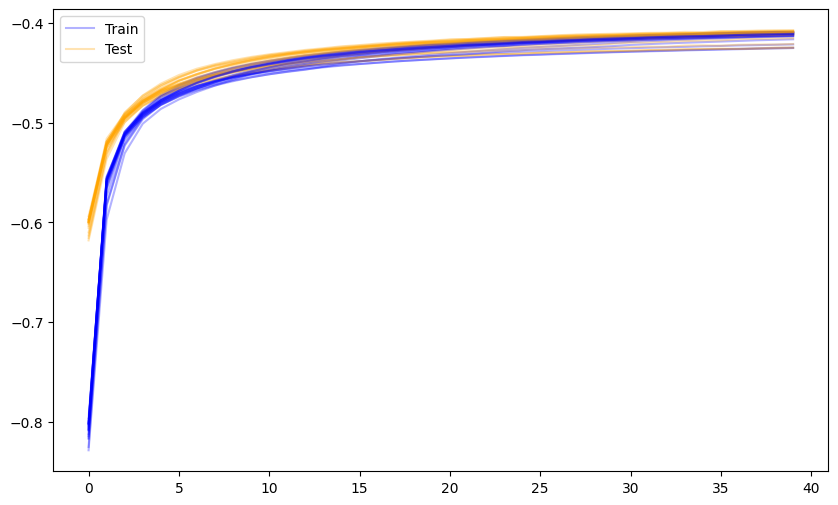

In [28]:
import random
import matplotlib.pyplot as plt

# Assuming 'results' is your list
sample = random.sample(data, 20)

plt.figure(figsize=(10, 6))
for i, item in enumerate(sample):
    # Adjust keys if using objects instead of dicts
    plt.plot(item['train_elbos'], c='blue', alpha=0.3, label='Train' if i == 0 else "")
    plt.plot(item['test_elbos'], c='orange', alpha=0.3, label='Test' if i == 0 else "")

plt.legend()
plt.show()

In [29]:
import pandas as pd

# 'results' is your list of dictionaries
df = pd.json_normalize(data)

# Select grouping keys and flattened disentanglement metrics
group_cols = ['n_labels', 'corruption_rate', 'alpha']
metric_cols = [c for c in df.columns if c.startswith('disentanglement_metrics')] + ['final_test_elbo', 'final_test_accuracy']

# Aggregate with mean and std
summary_df = df.groupby(group_cols)[metric_cols].agg(['mean', 'var'])
summary_df

disentanglement_metrics.beta_vae            \
                                                           mean       var   
n_labels corruption_rate alpha                                              
100      0.0             0.1                           0.177889  0.000246   
                         0.5                           0.172222  0.000402   
                         1.0                           0.173667  0.000343   
                         10.0                          0.163222  0.000594   
                         25.0                          0.154111  0.001065   
                         50.0                          0.151667  0.001359   
                         75.0                          0.148556  0.001631   
                         100.0                         0.143556  0.001945   
600      0.0             0.1                           0.167111  0.000330   
                         0.5                           0.155111  0.000297   
                         1.0                           0.159333  0.000301   
                         10.0                          0.133778  0.000667   
                         25.0                          0.115333  0.000941   
                         50.0                          0.102111  0.000664   
                         75.0                          0.095111  0.000635   
                         100.0                         0.091889  0.000693   
1000     0.0             0.1                           0.156556  0.000364   
                         0.5                           0.150667  0.000352   
                         1.0                           0.146889  0.000367   
                         10.0                          0.126222  0.000718   
                         25.0                          0.092000  0.000138   
                         50.0                          0.091111  0.000351   
                         75.0                          0.085889  0.000348   
                         100.0                         0.081111  0.000164   
3000     0.0             0.1                           0.150222  0.000766   
                         0.5                           0.131667  0.000224   
                         1.0                           0.126889  0.000301   
                         10.0                          0.086889  0.000058   
                         25.0                          0.078333  0.000027   
                         50.0                          0.073778  0.000024   
                         75.0                          0.070444  0.000034   
                         100.0                         0.073667  0.000118   

                               disentanglement_metrics.factor_vae            \
                                                             mean       var   
n_labels corruption_rate alpha                                                
100      0.0             0.1                             0.548860  0.003849   
                         0.5                             0.526066  0.005698   
                         1.0                             0.512488  0.008007   
                         10.0                            0.453257  0.022963   
                         25.0                            0.418055  0.034606   
                         50.0                            0.393371  0.044736   
                         75.0                            0.366587  0.056012   
                         100.0                           0.357784  0.060380   
600      0.0             0.1                             0.453421  0.002153   
                         0.5                             0.416977  0.003810   
                         1.0                             0.396781  0.004427   
                         10.0                            0.270041  0.011533   
                         25.0                            0.193638  0.016264   
                         50.0                            0.142352  0.01

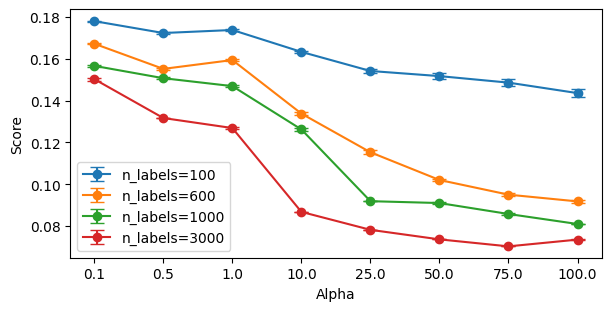

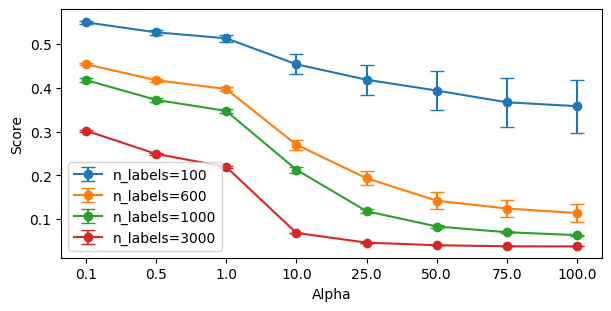

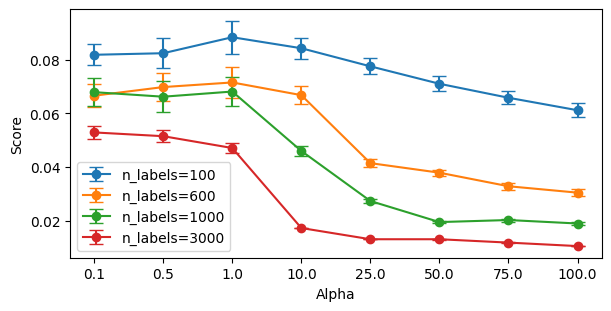

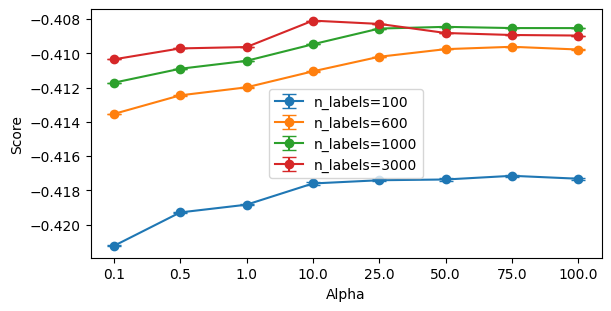

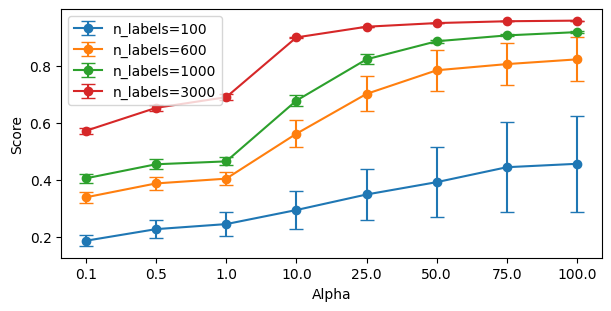

In [34]:
import matplotlib.pyplot as plt

# Flatten MultiIndex columns (e.g., ('metric', 'mean') -> 'metric_mean')
summary_df_flat = summary_df.copy()
summary_df_flat.columns = ['_'.join(col).strip() for col in summary_df_flat.columns.values]
df_plot = summary_df_flat.reset_index()

# Identify unique metrics
metrics = [c.replace('_mean', '') for c in df_plot.columns if c.endswith('_mean')]
alphas = sorted(df_plot['alpha'].unique())
alpha_to_idx = {rate: i for i, rate in enumerate(alphas)}

# Create subplots
# fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 3), constrained_layout=True)

for metric in metrics:
    fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
    for n_label, grp in df_plot.groupby('n_labels'):
        ax.errorbar(
            grp['alpha'].map(alpha_to_idx), 
            grp[f'{metric}_mean'], 
            yerr=grp[f'{metric}_var'], 
            label=f'n_labels={n_label}', 
            capsize=5, 
            marker='o'
        )
    # ax.set_xscale('log')
    ax.set_xticks(range(len(alphas)))
    ax.set_xticklabels(alphas)
    # ax.set_xticks(alphas)
    # ax.set_xticklabels(alphas)
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Score')
    ax.legend()
    plt.savefig(f'alpha_metric_{metric.split(".")[-1]}.png', dpi=300)
    plt.show()

## Noise Levels

In [36]:
import json
with open('noise_1_experiment.json', 'r') as file:
    data = json.load(file)

data[0].keys()

dict_keys(['dataset', 'n_labels', 'corruption_rate', 'alpha', 'seed', 'final_test_elbo', 'final_test_accuracy', 'train_elbos', 'test_elbos', 'test_accuracies', 'disentanglement_metrics', 'config'])

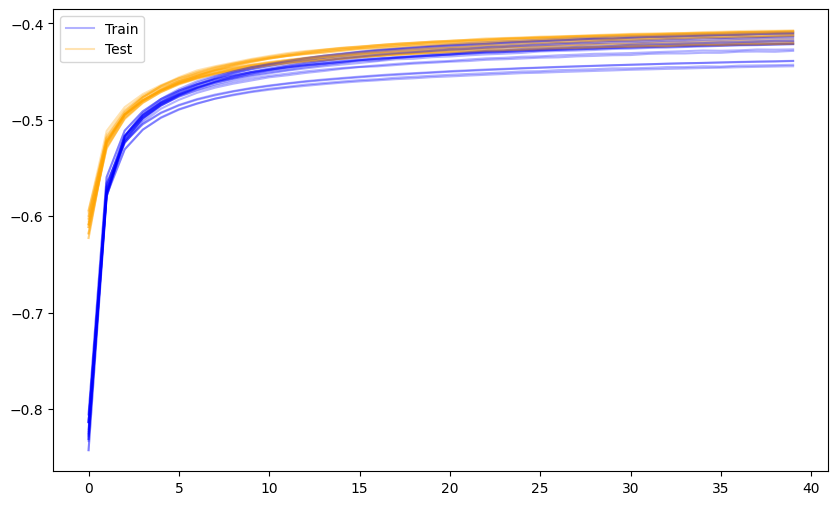

In [37]:
import random
import matplotlib.pyplot as plt

# Assuming 'results' is your list
sample = random.sample(data, 20)

plt.figure(figsize=(10, 6))
for i, item in enumerate(sample):
    # Adjust keys if using objects instead of dicts
    plt.plot(item['train_elbos'], c='blue', alpha=0.3, label='Train' if i == 0 else "")
    plt.plot(item['test_elbos'], c='orange', alpha=0.3, label='Test' if i == 0 else "")

plt.legend()
plt.show()

In [38]:
import pandas as pd

# 'results' is your list of dictionaries
df = pd.json_normalize(data)

# Select grouping keys and flattened disentanglement metrics
group_cols = ['n_labels', 'corruption_rate', 'alpha']
metric_cols = [c for c in df.columns if c.startswith('disentanglement_metrics')] + ['final_test_elbo', 'final_test_accuracy']

# Aggregate with mean and std
summary_df = df.groupby(group_cols)[metric_cols].agg(['mean', 'var'])
summary_df

disentanglement_metrics.beta_vae            \
                                                           mean       var   
n_labels corruption_rate alpha                                              
100      0.00            50.0                          0.151667  0.001359   
         0.01            50.0                          0.152000  0.001470   
         0.10            50.0                          0.151778  0.001362   
         0.20            50.0                          0.152667  0.001178   
         0.50            50.0                          0.164333  0.000598   
         1.00            50.0                          0.176889  0.000273   
600      0.00            50.0                          0.102111  0.000664   
         0.01            50.0                          0.098778  0.000724   
         0.10            50.0                          0.104667  0.000727   
         0.20            50.0                          0.115556  0.000680   
         0.50            50.0                          0.134889  0.000519   
         1.00            50.0                          0.178222  0.000762   
1000     0.00            50.0                          0.091111  0.000351   
         0.01            50.0                          0.089778  0.000491   
         0.10            50.0                          0.099444  0.000363   
         0.20            50.0                          0.104556  0.000318   
         0.50            50.0                          0.124222  0.000266   
         1.00            50.0                          0.182889  0.000430   
3000     0.00            50.0                          0.073778  0.000024   
         0.01            50.0                          0.076000  0.000048   
         0.10            50.0                          0.091556  0.000127   
         0.20            50.0                          0.098333  0.000121   
         0.50            50.0                          0.139556  0.000513   
         1.00            50.0                          0.194778  0.000234   

                               disentanglement_metrics.factor_vae            \
                                                             mean       var   
n_labels corruption_rate alpha                                                
100      0.00            50.0                            0.393371  0.044736   
         0.01            50.0                            0.398177  0.043053   
         0.10            50.0                            0.408050  0.039265   
         0.20            50.0                            0.420966  0.033871   
         0.50            50.0                            0.468574  0.018146   
         1.00            50.0                            0.549462  0.003822   
600      0.00            50.0                            0.142352  0.019137   
         0.01            50.0                            0.145756  0.018835   
         0.10            50.0                            0.166516  0.017376   
         0.20            50.0                            0.185367  0.015803   
         0.50            50.0                            0.301218  0.008526   
         1.00            50.0                            0.546274  0.003130   
1000     0.00            50.0                            0.083612  0.002933   
         0.01            50.0                            0.087502  0.003456   
         0.10            50.0                            0.109056  0.003402   
         0.20            50.0                            0.133215  0.003052   
         0.50            50.0                            0.260059  0.003807   
         1.00            50.0                            0.581640  0.002426   
3000     0.00            50.0                            0.040881  0.000008   
         0.01            50.0                            0.041901  0.000013   
         0.10            50.0                            0.065498  0.000031   
         0.20            50.0                          

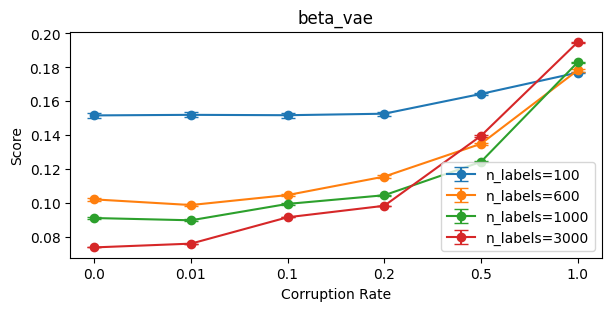

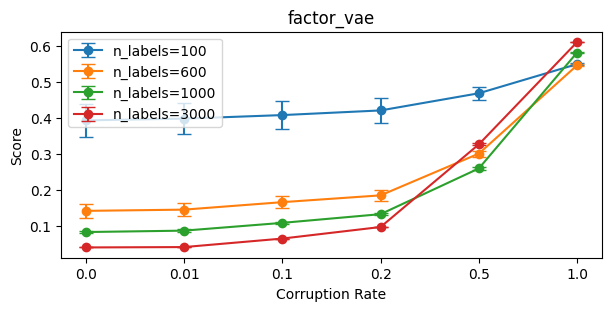

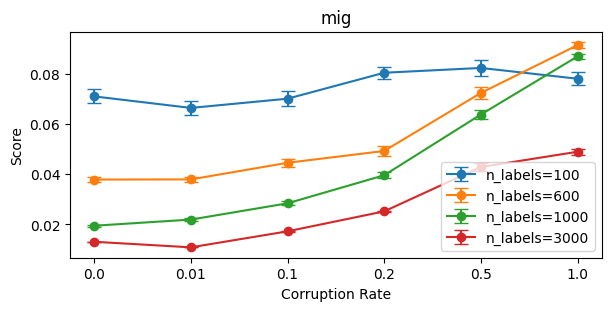

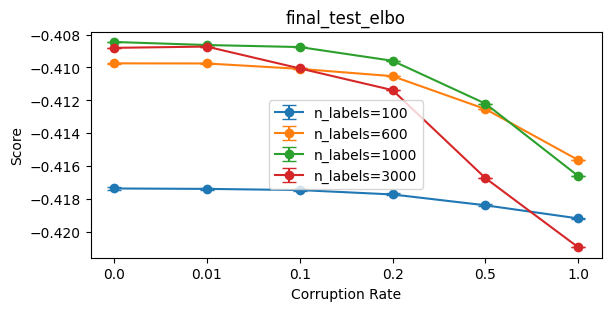

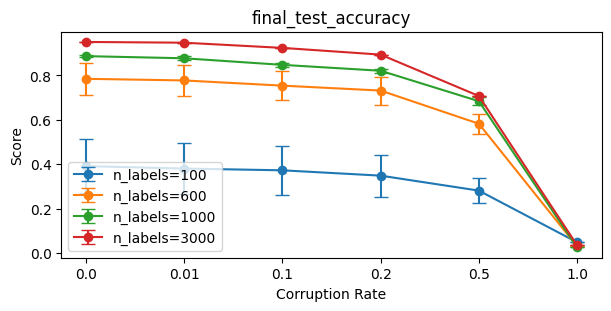

In [ ]:
import matplotlib.pyplot as plt

# Flatten MultiIndex columns
summary_df_flat = summary_df.copy()
summary_df_flat.columns = ['_'.join(col).strip() for col in summary_df_flat.columns.values]
df_plot = summary_df_flat.reset_index()

# Identify metrics
metrics = [c.replace('_mean', '') for c in df_plot.columns if c.endswith('_mean')]

# Create mapping for equidistant plotting
corruption_rates = sorted(df_plot['corruption_rate'].unique())
rate_to_idx = {rate: i for i, rate in enumerate(corruption_rates)}

# Create subplots
# fig, axes = plt.subplots(1, len(metrics), figsize=(6 * len(metrics), 3), constrained_layout=True)
# if len(metrics) == 1: axes = [axes]

for metric in metrics:
    fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
    for n_label, grp in df_plot.groupby('n_labels'):
        ax.errorbar(
            grp['corruption_rate'].map(rate_to_idx), # Use mapped indices here
            grp[f'{metric}_mean'], 
            yerr=grp[f'{metric}_var'], 
            label=f'n_labels={n_label}', 
            capsize=5, 
            marker='o'
        )
    
    ax.set_xticks(range(len(corruption_rates)))
    ax.set_xticklabels(corruption_rates)
    ax.set_xlabel('Corruption Rate')
    ax.set_ylabel('Score')
    ax.set_title(metric.split('.')[-1])
    ax.legend()
    plt.savefig(f'corruption_rate_{metric.split(".")[-1]}.png', dpi=300)
plt.show()